### This is the dataset link https://www.kaggle.com/datasets/fatemehmehrparvar/dementia/data

In [ ]:
#import stuffs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#my dementia dataset see if it works
dataset = pd.read_csv('C:/Users/tp-limwj/Downloads/dementia.csv')
dataset.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [ ]:
#Data types of each variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [ ]:
#delete useless columns that idk like dementia, lacunes_num(cus alr in lac_count), study, study1 and fazekas_cat
dataset_clean = dataset.copy()
columns_to_drop = ['dementia', 'lacunes_num', 'study', 'study1', 'fazekas_cat']
dataset_clean.drop(columns = columns_to_drop, axis =1, inplace=True)
dataset_clean.head()

,ID,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,3.0,7.0,3,>5,>=1
1,10,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,2.0,3.0,2,1 to 2,0


In [ ]:
dataset2 = dataset_clean.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print(dataset2.isnull().sum())

# of Rows, # of Columns:  (1842, 16)

Column Name           # of Null Values

ID                        0
age                       0
gender                    0
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
dtype: int64


In [ ]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(dataset2.isnull().sum()/1842*100) #1842 is the total number of data

# of Rows, # of Columns:  (1842, 16)

Column Name              % Null Values

ID                       0.000000
age                      0.000000
gender                   0.000000
dementia_all             0.000000
educationyears           0.000000
EF                      11.292074
PS                      14.549403
Global                  16.720955
diabetes                 0.000000
smoking                  0.597177
hypertension             0.000000
hypercholesterolemia     0.000000
SVD Simple Score        36.753529
SVD Amended Score       36.753529
Fazekas                  0.000000
lac_count                0.000000
dtype: float64


In [ ]:
#Extraction of possible data leakage variables such as SVD SIMPLe score and amended score
dataset_leakage = pd.DataFrame(dataset_clean[['SVD Simple Score', 'SVD Amended Score', 'dementia_all']])
display(dataset_leakage)

,SVD Simple Score,SVD Amended Score,dementia_all
0,3.0,7.0,0
1,2.0,3.0,0
2,1.0,2.0,0
3,2.0,4.0,1
4,2.0,3.0,0
...,...,...,...
1837,NaN,NaN,0
1838,NaN,NaN,0
1839,0.0,0.0,0
1840,0.0,0.0,0


In [ ]:
dataset_leakage.corr()

,SVD Simple Score,SVD Amended Score,dementia_all
SVD Simple Score,1.000000,0.901032,0.233746
SVD Amended Score,0.901032,1.000000,0.286705
dementia_all,0.233746,0.286705,1.000000


#### Thus 0.23/0.28, not much correlation to prob of dementia, so no data leakage

# Data Cleaning

In [ ]:
# fill up empty SVD simple and amended score with mean of data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
columns_to_impute = ['EF', 'PS', 'Global','SVD Simple Score', 'SVD Amended Score']
dataset_clean_mean = dataset_clean.copy()
dataset_clean_mean[columns_to_impute] = imputer.fit_transform(dataset_clean_mean[columns_to_impute])

#median
dataset_clean_median = dataset_clean.copy()
imputer = SimpleImputer(strategy = 'median')
dataset_clean_median[columns_to_impute] = imputer.fit_transform(dataset_clean_median[columns_to_impute])

#most_frequent
dataset_clean_mostfreq = dataset_clean.copy()
imputer = SimpleImputer(strategy = 'most_frequent')
dataset_clean_mostfreq[columns_to_impute] = imputer.fit_transform(dataset_clean_mostfreq[columns_to_impute])

### This is XGBoost

In [ ]:
dataset_encoded_mean = pd.get_dummies(dataset_clean_mean, drop_first=True) #using one-hot encoding, remove the first level to reduce no of columns
dataset_encoded_mean.describe()

dataset_encoded_median = pd.get_dummies(dataset_clean_median, drop_first=True)
dataset_encoded_mostfreq = pd.get_dummies(dataset_clean_mostfreq, drop_first=True)

##### Testing XGboost for mean

Accuracy: 0.9513513513513514
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       176
           1       0.50      0.11      0.18         9

    accuracy                           0.95       185
   macro avg       0.73      0.55      0.58       185
weighted avg       0.93      0.95      0.94       185

ROC-AUC Score: 0.7727272727272727


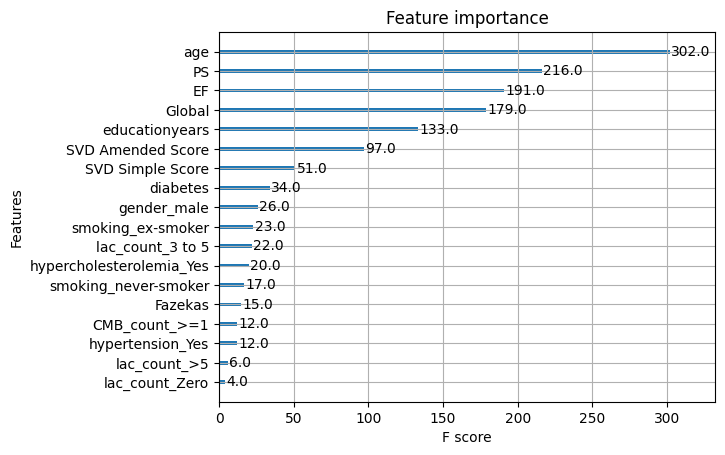

[[175   1]
 [  8   1]]


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier #regressor used for continuous variables
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

X = dataset_encoded_mean.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_mean['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

model = XGBClassifier(n_estimators=100, max_depth=5 , colsample_bytree=0.8, learning_rate=0.05, random_state=123) #colsample_bytree is randomly selecting a fraction of features
model.fit(X_train, y_train)

# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluate the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val)) #recall is ratio of correctly predicted positives to all observations
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) #trade off between true positive and false positive
#i used the actual y value which is 0 or 1 instead of a probability thats being predicted, so now this using proba, its more accurate
# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix = (y_pred_proba_val > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_pred_matrix)
print(conf_matrix)

##### Grid Search for optimal parameters for xgbclassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 0.8],
    'subsample' : [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', n_jobs=-1) #n_jobs = -1 means use all processors
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC-AUC score from grid search: {best_score}")

Best parameters: {'colsample_bytree': 0.3, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
Best ROC-AUC score from grid search: 0.8327916156222791


In [ ]:
# Train the model with best parameters
best_model = XGBClassifier(n_estimators=100, max_depth=7 , colsample_bytree=0.3, subsample = 0.7, random_state=123)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)
y_pred_proba = best_model.predict_proba(X_train)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print(f"ROC-AUC Score: {roc_auc}")

# Feature importance
xgb.plot_importance(best_model)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [185, 1473]

##### XGBoost for median

Accuracy: 0.9239130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       171
           1       0.33      0.08      0.12        13

    accuracy                           0.92       184
   macro avg       0.63      0.53      0.54       184
weighted avg       0.89      0.92      0.90       184

ROC-AUC Score: 0.7453891138101665
Accuracy: 0.9513513513513514
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       176
           1       0.50      0.11      0.18         9

    accuracy                           0.95       185
   macro avg       0.73      0.55      0.58       185
weighted avg       0.93      0.95      0.94       185

ROC-AUC Score: 0.7689393939393939


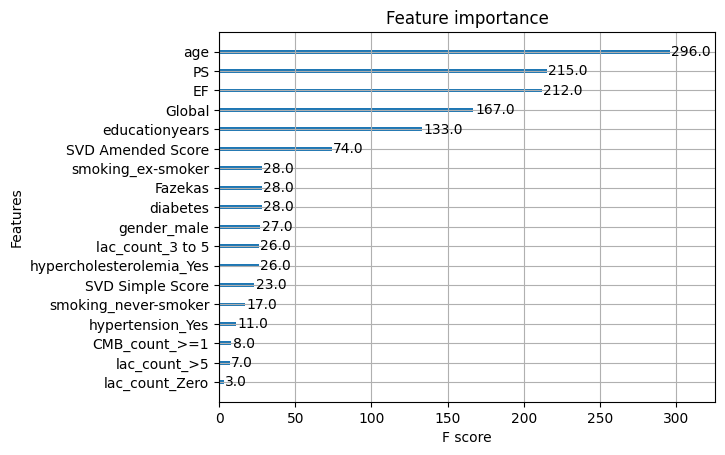

[[169   2]
 [ 12   1]]
[[175   1]
 [  8   1]]


In [ ]:
X = dataset_encoded_median.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_median['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123) #50% of 20% is 10%

model.fit(X_train, y_train)
# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluating the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) 

# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix_val = (y_pred_proba_val > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_val, y_pred_matrix_val)
print(conf_matrix_val)

##### XGBoost for most_freq

Accuracy: 0.9293478260869565
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       171
           1       0.50      0.08      0.13        13

    accuracy                           0.93       184
   macro avg       0.72      0.54      0.55       184
weighted avg       0.90      0.93      0.90       184

ROC-AUC Score: 0.782276203328835
Accuracy: 0.9513513513513514
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       176
           1       0.00      0.00      0.00         9

    accuracy                           0.95       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.91      0.95      0.93       185

ROC-AUC Score: 0.7746212121212122


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

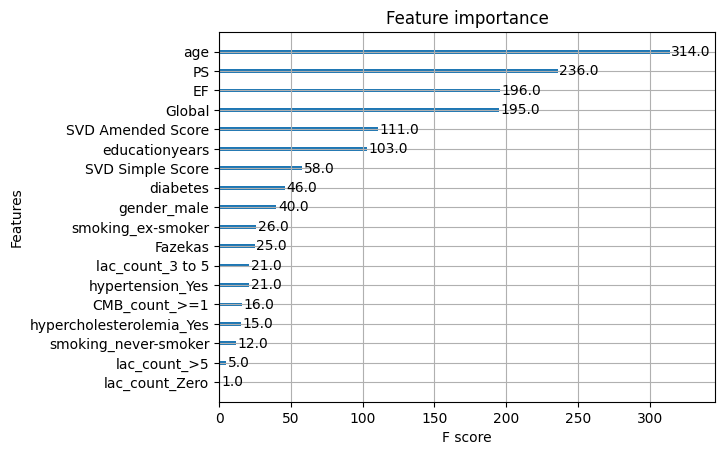

[[170   1]
 [ 12   1]]
[[176   0]
 [  9   0]]


In [ ]:
X = dataset_encoded_mostfreq.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_mostfreq['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123) #50% of 20% is 10%

model.fit(X_train, y_train)
# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluating the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) 

# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix_val = (y_pred_proba_val > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_val, y_pred_matrix_val)
print(conf_matrix_val)


##### Grid Search for optimal parameters for xgbclassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 0.8],
    'subsample' : [0.5, 0.7, 1.0]
}

model = XGBClassifier(random_state=123)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', n_jobs=-1) #n_jobs = -1 means use all processors
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # average roc auc score across all variation folds
print(f"Best parameters: {best_params}")
print(f"Best ROC-AUC score from grid search: {best_score}")

Best parameters: {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Best ROC-AUC score from grid search: 0.8188038123415697


Accuracy: 0.9021739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       171
           1       0.14      0.08      0.10        13

    accuracy                           0.90       184
   macro avg       0.54      0.52      0.52       184
weighted avg       0.88      0.90      0.89       184

ROC-AUC Score: 0.7008547008547008


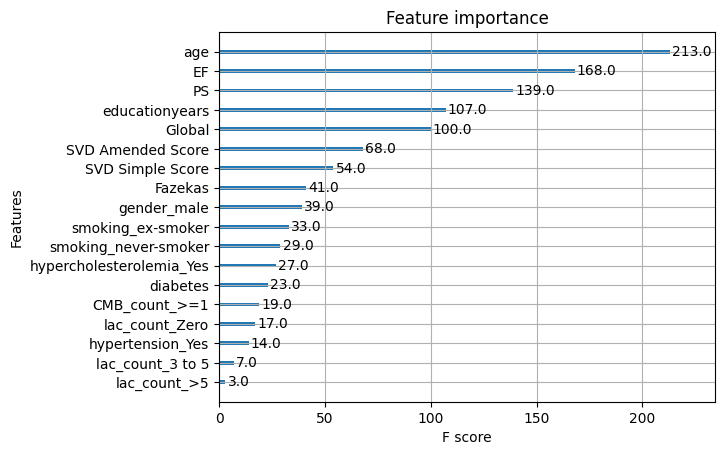

In [ ]:
# Train the model with best parameters
best_model = XGBClassifier(n_estimators=100, max_depth=5 , colsample_bytree=0.7, subsample = 0.5, random_state=123)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print(f"ROC-AUC Score: {roc_auc}")

# Feature importance
xgb.plot_importance(best_model)
plt.show()

##### Using mutual Information to select the most relevant features to predict dementia

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_df_sorted = mi_df.sort_values(by='mi_score', ascending=False)
mi_df_sorted.head(20) #print out the dataframe 

,feature,mi_score
4,Global,0.037523
3,PS,0.035712
7,SVD Amended Score,0.033340
2,EF,0.031160
0,age,0.024568
6,SVD Simple Score,0.022020
1,educationyears,0.020494
8,Fazekas,0.011474
15,lac_count_>5,0.010037
17,CMB_count_>=1,0.007988


In [ ]:
top_features = mi_df_sorted.head(5)['feature'].tolist() #use the 5 top features

X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
best_y_prob = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
best_roc = roc_auc_score(y_test, best_y_prob)
print(roc_auc)
print(best_roc)

0.7828451365714991
0.7755839822024471


##### Curious, so what if I didnt do any data cleaning to fill up the na data with mean, will the score be similar?

In [ ]:
#use original data set

new_dataset = pd.get_dummies(dataset, drop_first=True) #using one-hot encoding to convert categorical

X = new_dataset.drop(['dementia_all', 'ID', 'dementia'], axis=1) #all features
y = new_dataset['dementia_all'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred)) #recall is ratio of correctly predicted positives to all observations
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba)) #trade off between true positive and false positive
#i used the actual y value which is 0 or 1 instead of a probability thats being predicted, so now this using proba, its more accurate

Accuracy: 0.9222423146473779
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       515
           1       0.38      0.21      0.27        38

    accuracy                           0.92       553
   macro avg       0.66      0.59      0.62       553
weighted avg       0.90      0.92      0.91       553

ROC-AUC Score: 0.8075625958099131


#### Therefore, using dataset without imputer is best 

In [ ]:
#use original data set
#new_dataset = pd.get_dummies(dataset, drop_first=True) #using one-hot encoding to convert categorical
# Convert object columns to category type
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].astype('category')

X = dataset.drop(['dementia_all', 'ID', 'dementia'], axis=1) #all features
y = dataset['dementia_all'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, enable_categorical=True)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'n_estimators': 100,
    'max_depth': 5,
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,
    'random_state': 42,
    'eval_metric': 'auc'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [09:04:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9294755877034359
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       518
           1       0.17      0.03      0.05        35

    accuracy                           0.93       553
   macro avg       0.55      0.51      0.51       553
weighted avg       0.89      0.93      0.91       553

ROC-AUC Score: 0.8005239933811362
